**Step 1**: Importing libraries and Exploring the Dataset.

**Step 2**: Definining Exploratory Data Analysis with an overview of the whole project .

**Step 3**: Checking missing values and Outliers

**Step 4**: Creating visual methods to analyze the data.

**Step 5**: Making Data Preprossing & Cleaning

**Step 6**: Feature transformation

**Step 7**: Features Scalling

**Step 8**: creat a model that fits the data

**Step 9**: creating an accurecy table

##step 1: Importing libraries and Exploring the Dataset

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd

#For Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split

#Feature Scaling
from sklearn.preprocessing import StandardScaler

#For Fitting
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv("/content/tested.csv")

##Step 2: Definining Exploratory Data Analysis with an overview of the whole project

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.shape

(418, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


##Step 3: Checking missing values , Outliers and Duplicates

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df.isnull().sum()/len(df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [9]:
df.duplicated().sum()

0

In [10]:
print(df['Embarked'].value_counts())
print(50*'*')
print(df['Sex'].value_counts())
print(50*'*')
print(df['SibSp'].value_counts())
print(50*'*')
print(df['Pclass'].value_counts())
print(50*'*')
print(df['Parch'].value_counts())
print(50*'*')

S    270
C    102
Q     46
Name: Embarked, dtype: int64
**************************************************
male      266
female    152
Name: Sex, dtype: int64
**************************************************
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64
**************************************************
3    218
1    107
2     93
Name: Pclass, dtype: int64
**************************************************
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64
**************************************************


In [11]:
# check outliers
columns = [ 'Age', 'SibSp','Parch', 'Fare']
for col in columns:
    # calculate interquartile range
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( df[col] < lower) | (df[col] > upper) )
    index_label = df[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    #df.drop(index_label, inplace=True) ------->we will drop it in cleaning step , here we check only

Number of outliers in Age: 0
Number of outliers in SibSp: 11
Number of outliers in Parch: 94
Number of outliers in Fare: 0


**Categorical Columns:**

Survived(0 / 1)

Sex(Male/female)

Embarked(s/q/c)

SibSp(0:5)

Pclass(1/2/3)

Parch(0:5)

**Numerical Columns:**

Age

PassengerId

Fare

**Object Columns:**

-Name

-Ticket

-Cabin

##Step 4 : Creating visual methods to analyze the data

in first phase , we create visuallization to analyze each column

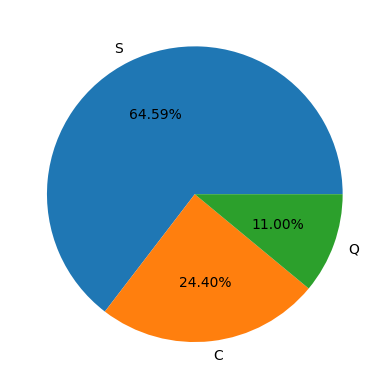

In [12]:
label= ["S","C","Q"]
plt.pie(df["Embarked"].value_counts(), labels = label,autopct = '%2.2f%%')
plt.show()

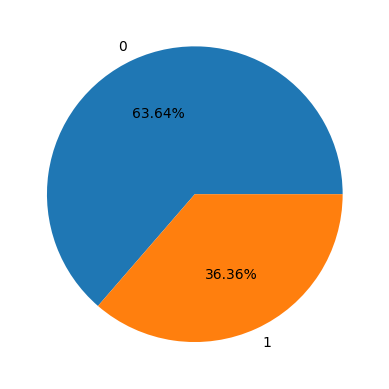

In [13]:
label2= [0,1]
plt.pie(df["Survived"].value_counts(), labels = label2,autopct = '%2.2f%%')
plt.show()

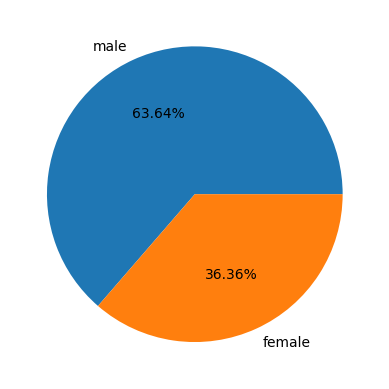

In [14]:
label3= ["male","female"]
plt.pie(df["Sex"].value_counts(), labels = label3,autopct = '%2.2f%%')
plt.show()

see relation between target column and other columns

<Axes: xlabel='Sex', ylabel='count'>

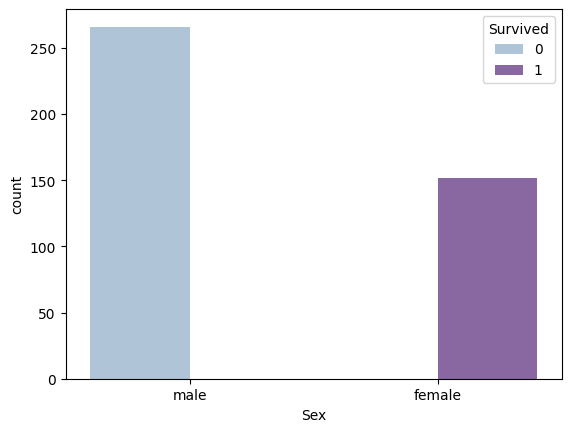

In [15]:
sns.countplot(x='Sex', data=df, hue="Survived", palette='BuPu')

<Axes: xlabel='Pclass', ylabel='count'>

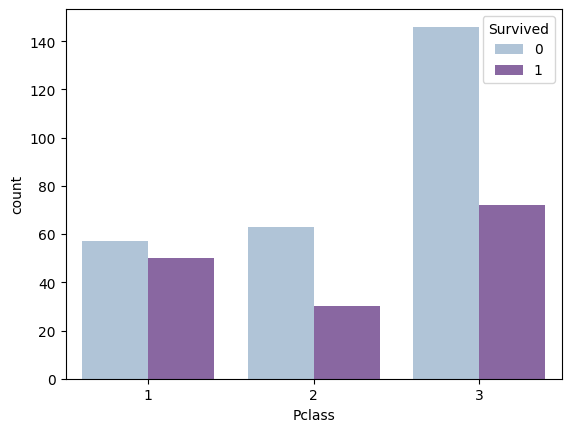

In [16]:
sns.countplot(x='Pclass', data=df, hue="Survived", palette='BuPu')

<Axes: xlabel='Embarked', ylabel='count'>

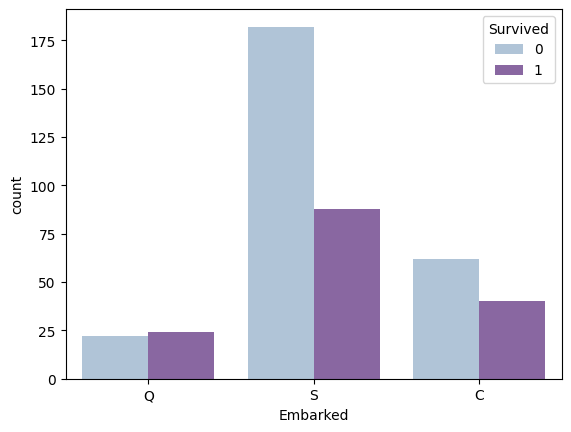

In [17]:
sns.countplot(x='Embarked', data=df, hue="Survived", palette='BuPu')

<Axes: xlabel='SibSp', ylabel='count'>

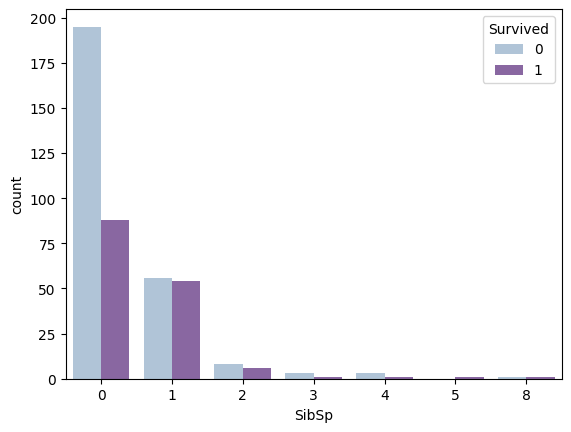

In [18]:
sns.countplot(x='SibSp', data=df, hue="Survived", palette='BuPu')

<Axes: xlabel='Parch', ylabel='count'>

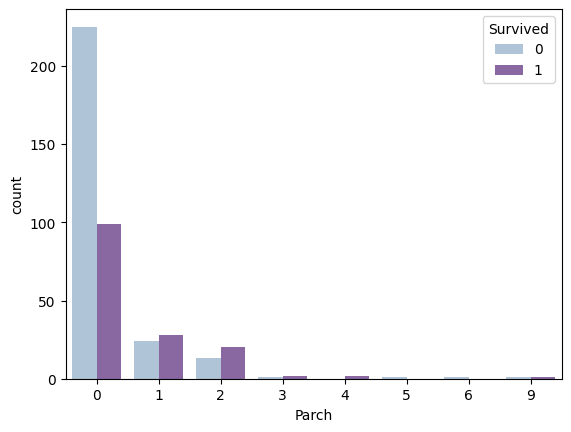

In [19]:
sns.countplot(x='Parch', data=df, hue="Survived", palette='BuPu')

Correlation & HeatMap

In [20]:
#correlation
df.corr()

<ipython-input-20-a46c601d5826>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


<ipython-input-21-148b0d0c7c36>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

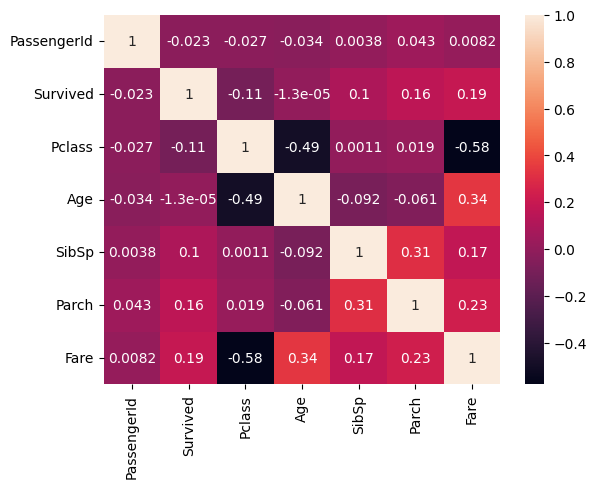

In [21]:
# Heatmap
sns.heatmap(df.corr(), annot=True)

##Step 5: Making Data Preprossing & Cleaning

In [22]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df.dropna(inplace=True)
df.drop(['PassengerId','Name','Cabin','Ticket'], axis=1, inplace=True)

In [23]:
#encoding
df['Sex']=df['Sex'].astype('category')
df['Sex']=df['Sex'].cat.codes

In [24]:
df['Embarked']=df['Embarked'].astype('category')
df['Embarked']=df['Embarked'].cat.codes

In [25]:
# check outliers
columns = [ 'Age', 'SibSp','Parch', 'Fare']
for col in columns:
    # calculate interquartile range
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( df[col] < lower) | (df[col] > upper) )
    index_label = df[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    df.drop(index_label, inplace=True) ##we drop outliers here

Number of outliers in Age: 0
Number of outliers in SibSp: 1
Number of outliers in Parch: 4
Number of outliers in Fare: 5


In [26]:
df.duplicated().sum() ##duplicates may be apper here , because we fill nulls

0

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
12,1,1,0,23.0,1,0,82.2667,2
14,1,1,0,47.0,1,0,61.1750,2
26,1,1,0,22.0,0,1,61.9792,0
28,0,1,1,41.0,0,0,30.5000,2
34,0,1,1,30.0,1,0,57.7500,0
...,...,...,...,...,...,...,...,...
404,0,1,1,43.0,1,0,27.7208,0
405,0,2,1,20.0,0,0,13.8625,0
407,0,1,1,50.0,1,1,211.5000,0
411,1,1,0,37.0,1,0,90.0000,1


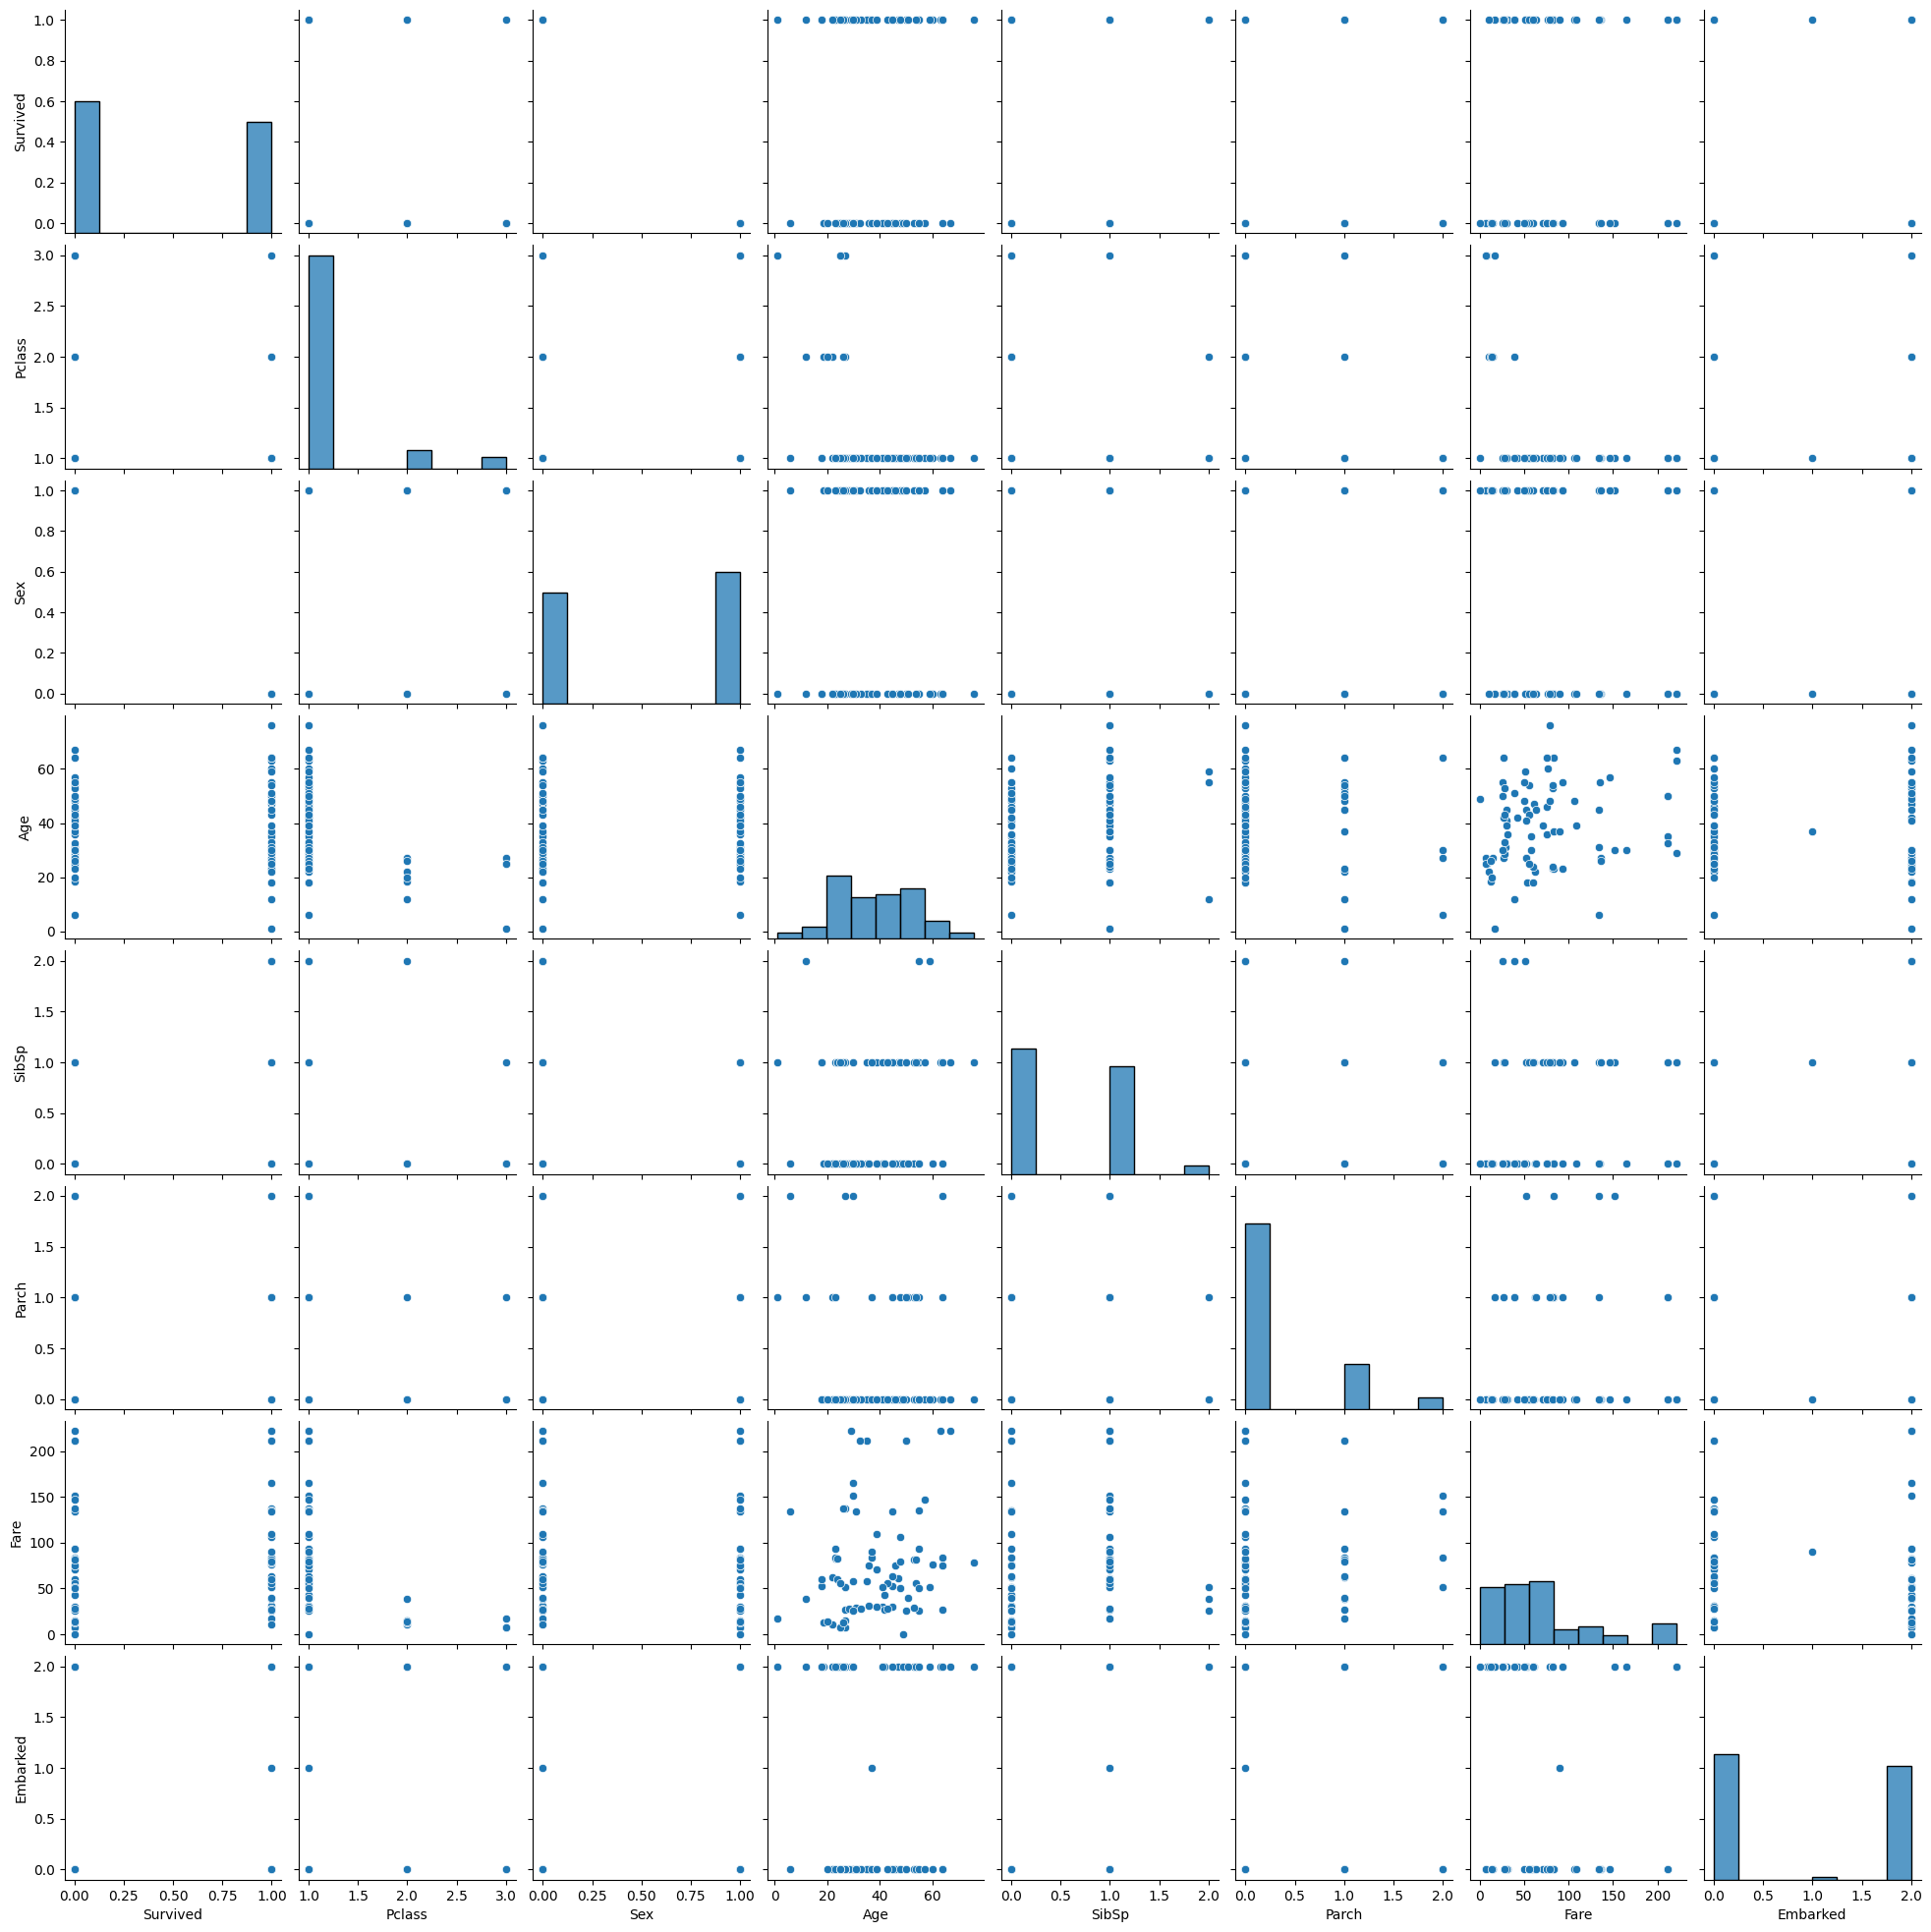

In [29]:
sns.pairplot(df)

##Fit Data

In [30]:
##Splitting Data into X(Features) and Y(Target Prediction)
X=df.drop(columns=['Survived'],axis=1)
y=df['Survived']

In [31]:
print(X)

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
12        1    0  23.0      1      0   82.2667         2
14        1    0  47.0      1      0   61.1750         2
26        1    0  22.0      0      1   61.9792         0
28        1    1  41.0      0      0   30.5000         2
34        1    1  30.0      1      0   57.7500         0
..      ...  ...   ...    ...    ...       ...       ...
404       1    1  43.0      1      0   27.7208         0
405       2    1  20.0      0      0   13.8625         0
407       1    1  50.0      1      1  211.5000         0
411       1    0  37.0      1      0   90.0000         1
414       1    0  39.0      0      0  108.9000         0

[81 rows x 7 columns]


In [32]:
print(y)

12     1
14     1
26     1
28     0
34     0
      ..
404    0
405    0
407    0
411    1
414    1
Name: Survived, Length: 81, dtype: int64


In [33]:
##Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =2/5, random_state = 0)
print(X.shape,X_train.shape,X_test.shape)

(81, 7) (48, 7) (33, 7)


In [34]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##Logistic Regression

In [35]:
logistic = LogisticRegression(random_state = 0)

In [36]:
## train my model
logistic.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [37]:
y_pred = logistic.predict(X_test)

In [38]:
##confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[15  0]
 [ 0 18]]


In [39]:
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        18

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [40]:
accuracy_score(y_test, y_pred)

1.0

##KNN

In [41]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("Training accuracy score : ",knn.score(X_train, y_train) * 100)
# Calculate the accuracy of the model
print("Test accuracy score : ",knn.score(X_test, y_test) * 100)

Training accuracy score :  97.91666666666666
Test accuracy score :  96.96969696969697


##Decision Tree

In [42]:
clf = DecisionTreeClassifier(max_depth = 3 , criterion = 'entropy', random_state = 0)
clf = clf.fit(X_train,y_train)
# Model Accuracy, how often is the classifier correct?
print(clf.score(X_test, y_test) * 100)

100.0
